<a href="https://colab.research.google.com/github/AnnSenina/Python_CL_2023/blob/main/notebooks/%D0%A2%D0%B2%D0%B8%D1%82%D1%8B_%D0%A2%D1%80%D0%B0%D0%BC%D0%BF%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# все библиотеки и импорты разом
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
download('punkt')
download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english") # выше все для NLTK

import pandas as pd # пандас для табличек

from collections import Counter # посчет частот

from wordcloud import WordCloud
import matplotlib.pyplot as plt # облако слов

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def clean_text(text_str):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  # чистим от стоп-слов и пунктуации
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  # стеммим (если надо)
  text_stemmed = [stemmer.stem(word) for word in text_clean] # стемминг
  return text_stemmed

In [7]:
# читаем данные
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Python_CL_2023/main/data/trump.csv')
# превращаем столбец датафрейма в список
tweets = df['content'].to_list()
# передаем в функцию clean_text, но передать нужно строку: ' '.join(tweets)
text_list = clean_text(' '.join(tweets))

In [12]:
freq_bigramms = Counter(nltk.bigrams(text_list)) # для подсчета частот можно передать списком
freq_bigramms.most_common(20)

[(('donald', 'trump'), 1197),
 (('fake', 'news'), 711),
 (('make', 'america'), 624),
 (('america', 'great'), 613),
 (('ca', "n't"), 593),
 (('unit', 'state'), 560),
 (('cont', 'http'), 549),
 (('run', 'presid'), 519),
 (('look', 'forward'), 442),
 (('new', 'york'), 425),
 (('last', 'night'), 412),
 (('great', 'job'), 403),
 (('white', 'hous'), 383),
 (('http', 'via'), 359),
 (('crook', 'hillari'), 350),
 (('witch', 'hunt'), 335),
 (('hillari', 'clinton'), 311),
 (('mr.', 'trump'), 311),
 (('work', 'hard'), 254),
 (('presid', 'obama'), 248)]

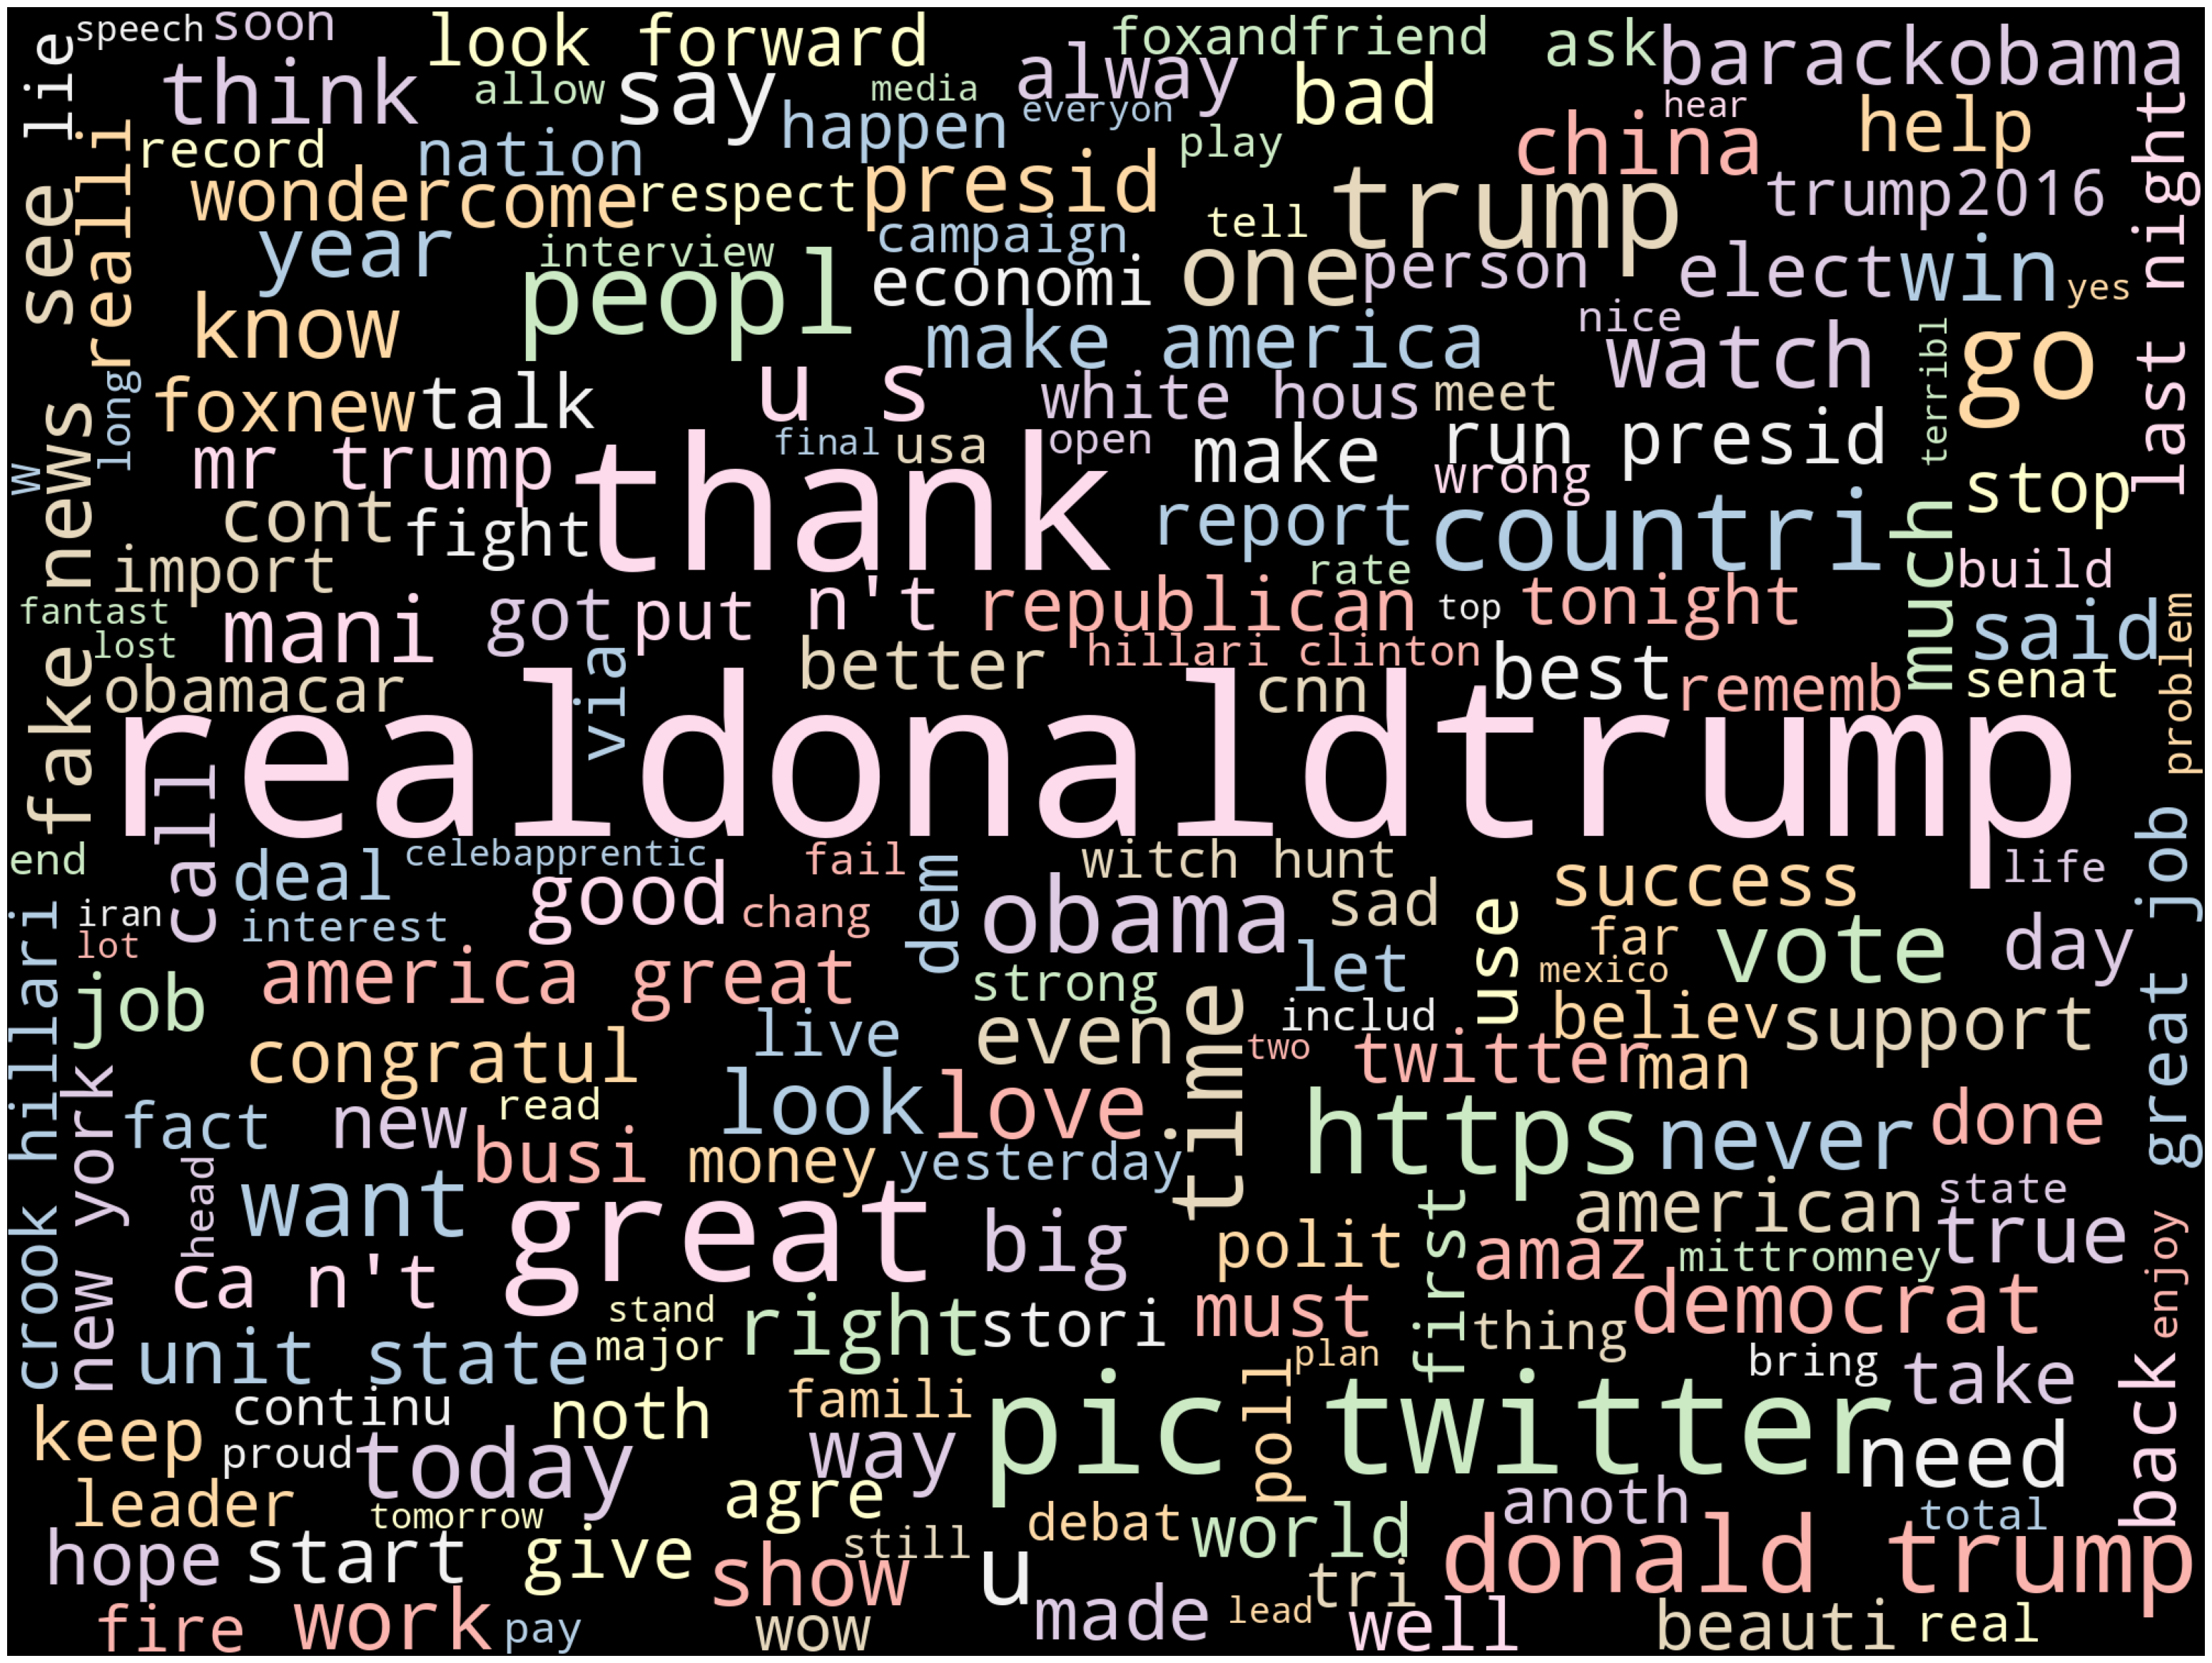

In [16]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='Pastel1').generate(', '.join(text_list)) # !!! облаку нужен текст как строка
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение